# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

(512, 512)


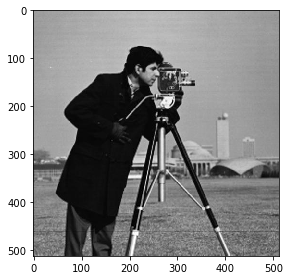

In [18]:
from skimage.io import imread,imsave,imshow
import matplotlib.pyplot as plt
%matplotlib inline

image = imread("camera.jpg")
print(image.shape) # 512 x 512 array ; row, column

imshow(image, cmap = plt.cm.gray) # essayer avec twilight, ou autre : https://matplotlib.org/stable/tutorials/colors/colormaps.html
imsave("camera_copy.jpg", image)
## -- Your code here -- ##


When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

In [19]:
import numpy as np
shape = image.shape
imMin, imMax = image.min(), image.max()
imageDataType = image.dtype

# Selecting image center, width of 100x100
center = image.shape[0]/2, image.shape[1]/2
size_x = 100
size_y = 100

# Attention, pas image[...][...] mais image[... , ...] !!
center_image = image[int(center[0]-size_x/2) : int(center[0]+size_x/2),int(center[1]-size_y/2) : int(center[1]+size_y/2)]




**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

In [20]:
from matplotlib import pyplot as plt

## -- Your code here -- ##

def compute_histogram(IMAGE) :
    h = [(IMAGE == v).sum() for v in range(0,256)]

    return h
def normalized_histogram(IMAGE) :
    hist = compute_histogram(IMAGE)
    norm_h = hist/sum(hist) # sum(h) = nombre de pixels
    #plt.bar(range(256),norm_h)
    
    return norm_h

# on ne réinvente pas la roue
#histogram = plt.hist(image.flatten(), bins = range(256))


# D'abord coder l'histogramme soi-même, pour s'assurer du résultat qu'on devrait obtenir
# Même conseil pour les filtres etc.

## 2.2 Histogram, some versions

- Attention, il faut mettre bins = 256 plutôt que bins = range(256) !! en fait, range(256) fait en sorte que 255 et 256 soient additionnés, donc ça craint
- Ou alors mettre bins = range(257)
- Voir la documentation pour cette chose

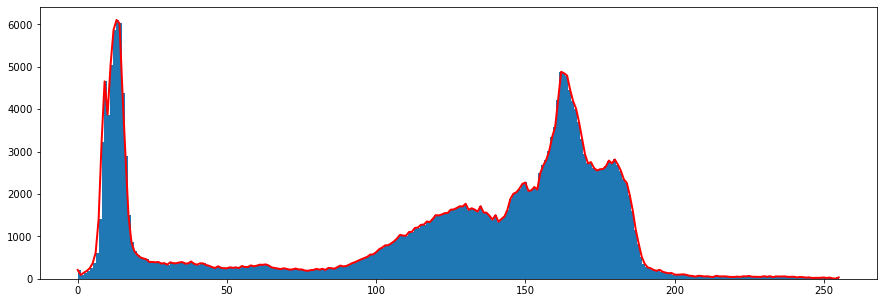

In [21]:
h = np.zeros((256,)).astype('int')

for row in image :
    for v in row :
        h[v]+= 1
        
norm_hist = h/np.linalg.norm(h)
plt.figure(figsize=(15,5))
plt.plot(h, lw=2, color="red")
plt.hist(image.flatten(), bins=256)

plt.show()

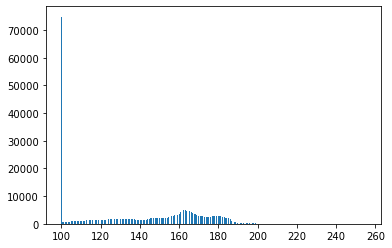

In [22]:
# modify image
im2 = image.copy()
im2 = np.maximum(im2, 100)

plt.figure()
plt.hist(im2.flatten(), bins=256)
plt.show()

Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

Compute and plot the **cumulated histogram**.

In [23]:
def cumulative_hist(image) :
    normalized = normalized_histogram(image)
    cumul = np.zeros((256))
    for i in range(256) :
        cumul[i] = normalized[i] + cumul[i-1]
    return cumul
        
ch = cumulative_hist(image)

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

In [24]:
    
# -- Your code here -- #
def entropy(im) :
    norm_hist = normalized_histogram(im)
    return - (norm_hist[norm_hist>0]*np.log(norm_hist[norm_hist>0])/np.log(2)).sum()

print(entropy(image))

7.065452040742867


## Conclusion
This indicates we need 7 bits and sime 

## Shuffle

**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='PyramidCompression.png' width='75%'/>

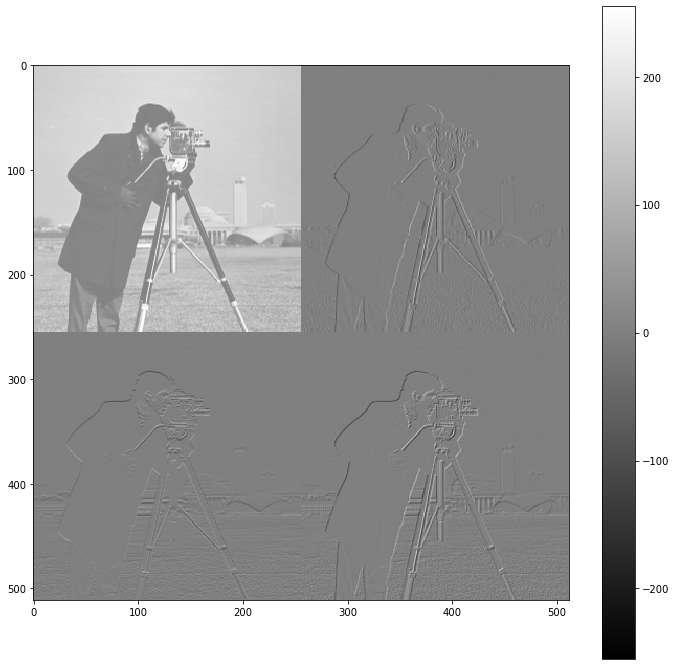

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im, n):
    if(im.shape[0] > n) :
        # does 4 sample
        a = im[0:-1:2,0:-1:2]
        b = im[0:-1:2,1::2]-a
        c = im[1::2,0:-1:2]-a
        d = im[1::2,1::2]-a

        R = np.vstack((np.hstack((split(a, n),b)),np.hstack((c,d))))
        
    else :
        R = im
    return R

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
s = split(im, 256)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

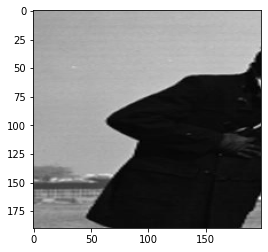

In [26]:
# possible thing :
x = 20
ymin = 20
ymax = 400
ystep = 2
im2 = image.copy()
im2 = im2[ymin:ymax:ystep, 1:200]
plt.imshow(im2)

**Compute how the image entropy evolves** with regards to the level of decomposition

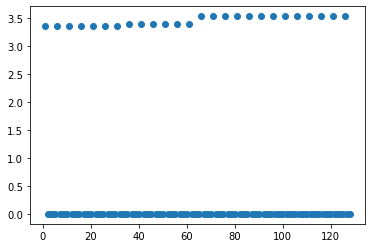

In [27]:
entropies = np.zeros(128)

for i in range(1, 129, 5) :
    entropies[i-1] = (entropy(split(im, i)))
    
plt.scatter(range(1,129), entropies)

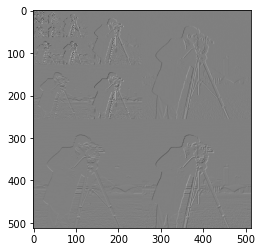

<BarContainer object of 512 artists>

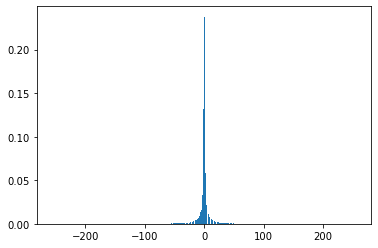

In [28]:
s = split(im, 1)
plt.imshow(s, cmap=cm.gray)
plt.show()
histogram, bins = np.histogram(s, bins=range(-256, 257), density = True)

plt.figure()
plt.bar(bins[:-1], histogram)


**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

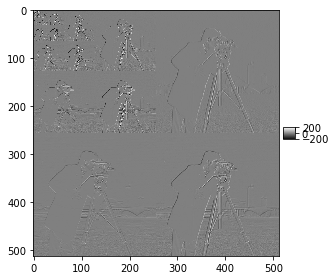

In [29]:
# -- Your code here -- #
imshow(s, cmap=cm.gray)

def reconstruct(im) :
    if (im.shape[0]%2 !=0) or (im.shape[1]%2 !=0) :
        return im
    
    else:
        
        midy = im.shape[0]//2
        midx = im.shape[1]//2
        
        a = reconstruct(im[:midy, :midx])
        b = im[:midy, midx:]
        c = im[midy:, :midx]
        d = im[midy:, midx:]
        
        im2 = im.copy()
        
        im2[::2, ::2] = a
        im2[::2, 1::2] = b + a
        im2[1::2, ::2] = c + a
        im2[1::2, 1::2] = d + a

        
        return im2
    
image_reconstr = (reconstruct(s))
plt.imshow(image_reconstr)

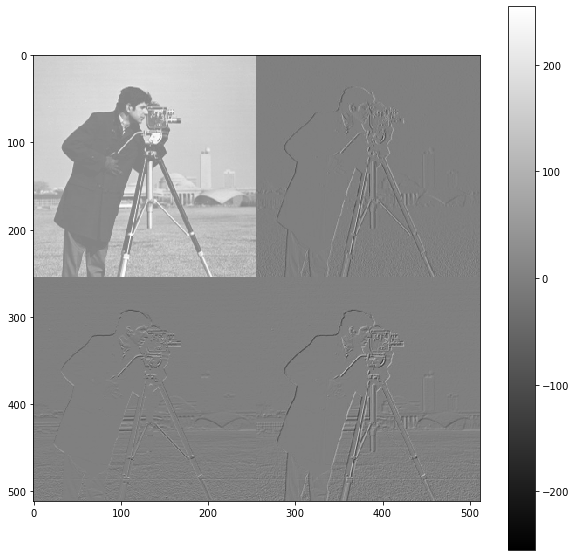

In [30]:
s = split(im, 256)
plt.figure(figsize=(10,10))
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

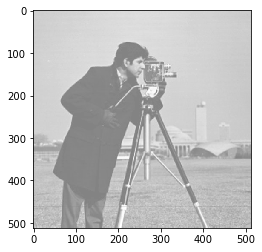

In [31]:
# implémenter level !!
def reconstruct(im) :
    
    y = im.shape[0]//2
    x = im.shape[1]//2
    
    a = im[:y, :x]
    b = im[:y, x:]+a
    c = im[y:, :x]+a
    d = im[y:, x:]+a
    
    im2 = im.copy()
    im2[0:-1:2, 0:-1:2] = a
    im2[0:-1:2, 1::2] = b
    im2[1::2, 0:-1:2] = c
    im2[1::2, 1::2] = d
    
    return im2

r = reconstruct(s)
plt.imshow(r,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)



## Attention : unsigned uint vs int16
- très important de convertir en int16 quand on ouvre une image !!!
- En effet, on calcule une différence à un moment, donc il faut garder le signe
- Si on prend l'image comme uint, ça va faire mettre un  0-255 à zéro, pour cause d'overflow, plutôt que -255 qui est important

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

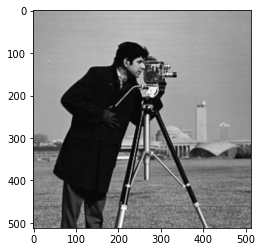

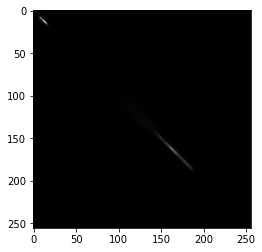

In [32]:
from skimage.feature import greycomatrix

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow

# -- Your code here -- #
def cooccurrence(image, dx, dy) :
    C = np.zeros((256,256))
    for y in range(image.shape[0] - dy) :
        for x in range(image.shape[1] - dx) :
            i = image[y,x]
            j = image[dy+y, dx+x]
            C[i,j] += 1
            
    return C

C = cooccurrence(im, 1, 1)

plt.figure()
plt.imshow(im)
plt.show()
plt.figure()
plt.imshow(C)
plt.show()

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

(512, 512, 3) uint8


<Figure size 432x288 with 0 Axes>

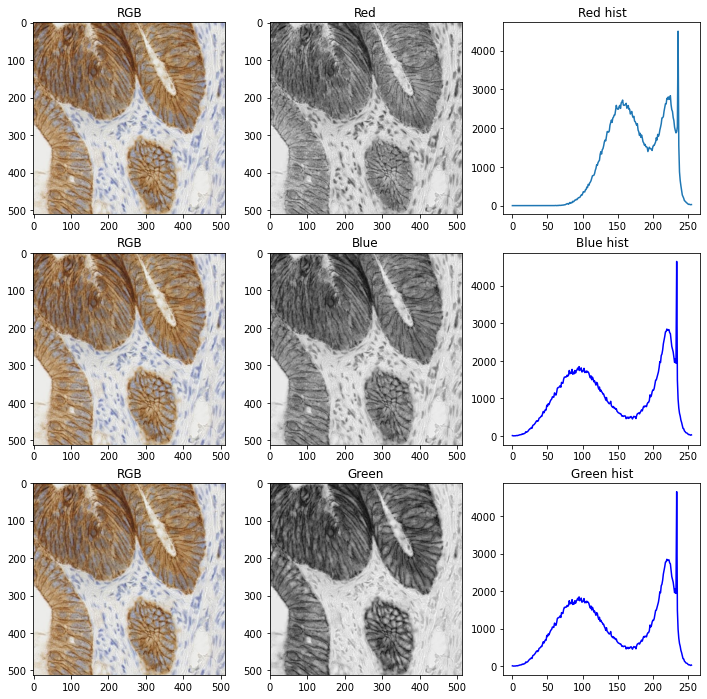

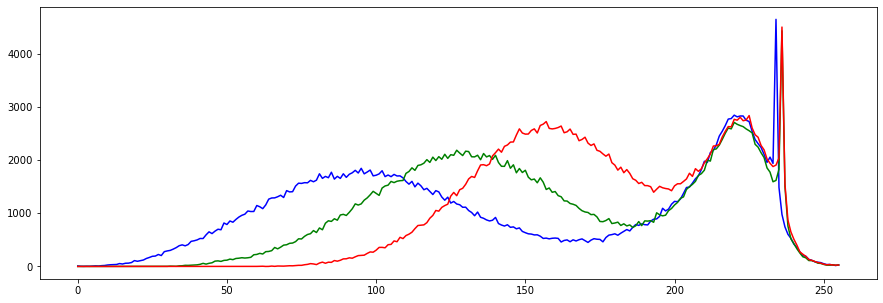

In [35]:
from skimage.data import immunohistochemistry

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.gray() # Use grayscale by default on 1-channel images, so you don't have to add cmap=plt.cm.gray everytime

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.imshow(im)
plt.title('RGB')
plt.subplot(3,3,2)
plt.imshow(r)
plt.title('Red')
plt.subplot(3,3,3)
plt.plot(compute_histogram(r))
plt.title('Red hist')
plt.subplot(3,3,4)
plt.imshow(im)
plt.title('RGB')
plt.subplot(3,3,5)
plt.imshow(g)
plt.title('Blue')
plt.subplot(3,3,6)
plt.plot(compute_histogram(b), '-b')
plt.title('Blue hist')
plt.subplot(3,3,7)
plt.imshow(im)
plt.title('RGB')
plt.subplot(3,3,8)
plt.imshow(b)
plt.title('Green')
plt.subplot(3,3,9)
plt.plot(compute_histogram(b), '-b')
plt.title('Green hist')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(compute_histogram(b), '-b')
plt.plot(compute_histogram(g), '-g')
plt.plot(compute_histogram(r), '-r')
plt.show()

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

(512, 512, 3) float64


Text(0.5, 1.0, 'Value histogram')

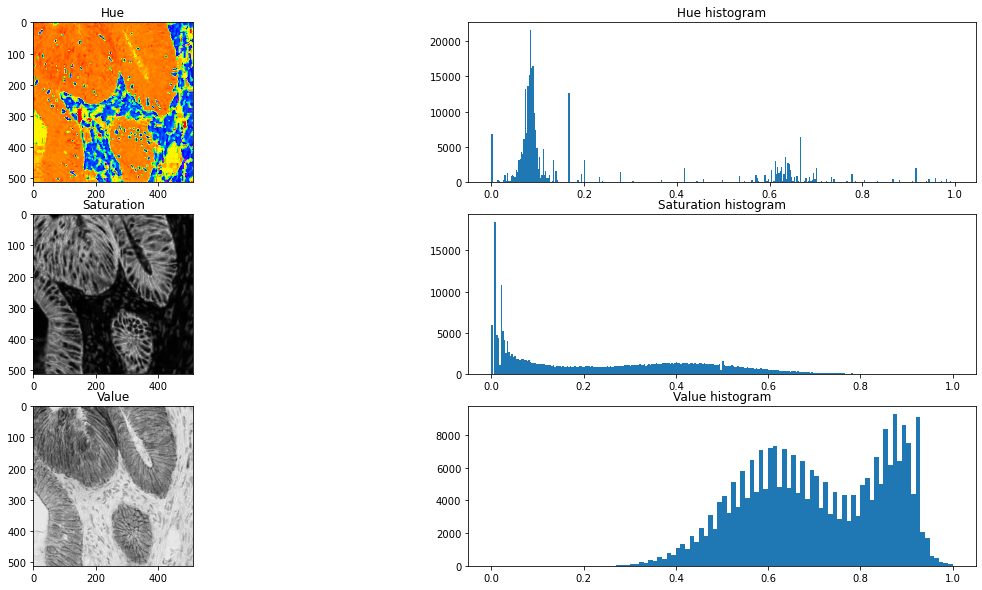

In [36]:
import skimage
hsv = skimage.color.rgb2hsv(im)
print(hsv.shape, hsv.dtype)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.imshow(h, cmap = cm.hsv)
plt.title("Hue")
plt.subplot(3,2,2)
plt.hist(h.flatten(), bins=360)
# Hue correspond à un angle, donc on peut prendre 360 par exemple, mais c'est assez arbitraire
# On voit une couleur qui est en grande majorité
plt.title("Hue histogram")


plt.subplot(3,2,3)
plt.imshow(s)
plt.title("Saturation")
plt.subplot(3,2,4)
plt.hist(s.flatten(), bins=300)
plt.title("Saturation histogram")


plt.subplot(3,2,5)
plt.imshow(v)
plt.title("Value")
plt.subplot(3,2,6)
#plt.hist(v.flatten(), bins=100)
plt.hist(v.flatten(), bins=np.arange(101)/100)
plt.title("Value histogram")

## Analysis
- Value is basically printing the image in black and white
- Saturation : intensity of the color
- Hue : "teinte" in French ; angle

There could be colors in the Hue, but that corresponds to pixels which have a very small Saturation

When we plot the histograms, we can see that it represents a very different kind of information than the rgb.

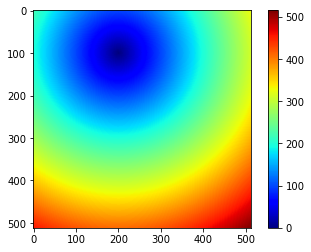

In [37]:
def distance_image_space(image, center_coords) :
    dmap = np.zeros((image.shape[0], image.shape[1]))
    
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]) :
            dmap[i,j] = np.sqrt((center_coords[0] - i)**2 + (center_coords[1]-j)**2)
            
    
    return dmap
space_dmap = distance_image_space(image, (100, 200))
plt.figure()
plt.imshow(space_dmap, cmap = cm.jet)
plt.colorbar()

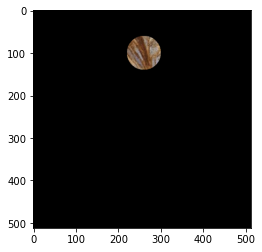

In [38]:
# Test for fun
space_dmap = distance_image_space(image, (100, 260))

mask= space_dmap < 40

im2 = im.copy()

im2[mask==False] = 0

plt.figure()
plt.imshow(im2)

In [39]:
def distance_color_space(image, center_coords) :
    dmap = np.zeros((image.shape[0], image.shape[1]))
    
    refcolor = image[center_coords[0], center_coords[1]]
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]) :
            dmap[i,j] = np.sqrt(((image[i,j] - refcolor)**2).sum())
            
    return dmap

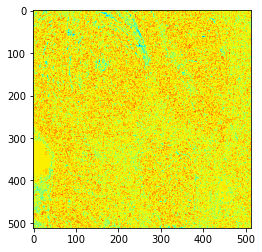

In [40]:
color_dmap = distance_color_space(im, (100, 260))
plt.figure()
plt.imshow(color_dmap, cmap=cm.jet)

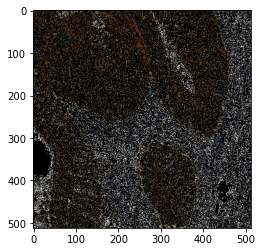

In [41]:
mask = (color_dmap <15)
im2 = im.copy()
im2[mask == False] = 0
plt.figure()
plt.imshow(im2)

**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


[  0 255]


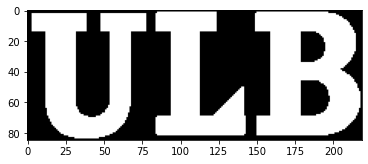

In [42]:

# -- Your code here -- #
watermark = imread('watermark.png').astype('int16')
im = imread('etretat.jpg').astype('int16')

print(np.unique(watermark))
plt.imshow(watermark, cmap = cm.gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<ipython-input-45-8c5b2e198376>:20: UserWarning: image_with_watermark.jpg is a low contrast image
  imsave("image_with_watermark.jpg", im_with_wm)
Lossy conversion from int16 to uint8. Range [-110, 255]. Convert image to uint8 prior to saving to suppress this warning.


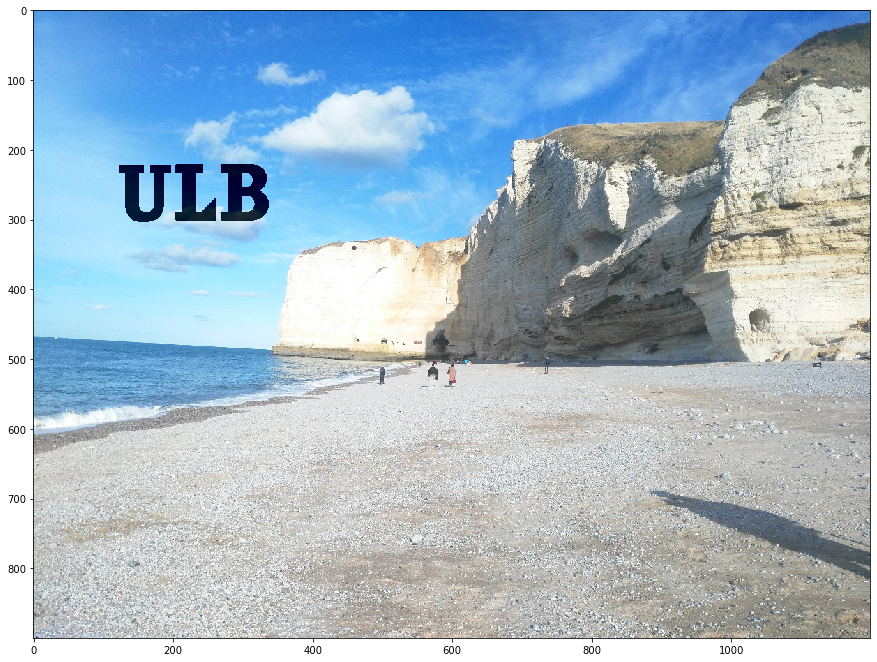

In [45]:
center = (0,0)


def add_watermark(image, watermark, center, opacity) :
    wy = watermark.shape[0]
    wx = watermark.shape[1]
    
    im2 = im.copy()
    
    for i in range(watermark.shape[0]) :
        for j in range(watermark.shape[1]) :
            if(watermark[i,j] != 0) :
                im2[center[0] + i, center[1] + j] -= 1*opacity
    
    return im2
im_with_wm = add_watermark(im, watermark, (220, 120), 200)
plt.figure(figsize=(15,15))
plt.imshow(im_with_wm,interpolation='nearest',cmap=cm.gray,vmin=0, vmax=255)

imsave("image_with_watermark.jpg", im_with_wm)

## Conclusion of the lab
- Histogram losses the spatial information of the image, but brings better knowledge of the distribution of the pixel values
- Rien compris sur la coocurrence matrix
    - One way to characterize the texture of the image
    
- If we don't have that the pixels that are close have close value, then the seen method of compresion won't work. We can check this using the cooccurrence matrix
    - We take distance of 1 : this gives the pairs of pixels that are close to each other with distance of 1
    - If we have values that are not on the diagonal, 
    - This means we have a great entropy